In [1]:
%matplotlib inline
import pandas as pd

In [2]:
nsdk_df=pd.read_csv('data/nsdk.csv')
rjzs_df=pd.read_csv('data/rjzs.csv')
szzs_df=pd.read_csv('data/szzs.csv')
zzqz_df=pd.read_csv('data/zzqz.csv')

In [3]:
nsdk_df

,datetime,nsdk
0,2008/1/2,1.000000
1,2008/1/3,0.997337
2,2008/1/4,0.959772
3,2008/1/7,0.957783
4,2008/1/8,0.935194
...,...,...
2639,2018/6/26,2.897587
2640,2018/6/27,2.852929
2641,2018/6/28,2.875381
2642,2018/6/29,2.877918


In [4]:
# outer合并四个数据
summary_df = pd.merge(nsdk_df, rjzs_df, on=['datetime'], how='outer').merge(
    szzs_df, on=['datetime'], how='outer').merge(zzqz_df, on=['datetime'], how='outer')

In [5]:
# datetime转时间格式
summary_df.datetime = pd.to_datetime(summary_df.datetime)

In [6]:
# 按照datetime排序
summary_df = summary_df.sort_values('datetime')
summary_df

,datetime,nsdk,rjzs,szzs,zzqz
0,2008-01-02,1.000000,NaN,1.000000,1.000000
1,2008-01-03,0.997337,NaN,1.008923,1.000895
2,2008-01-04,0.959772,1.000000,1.016834,1.001343
3,2008-01-07,0.957783,0.987009,1.022859,1.001253
4,2008-01-08,0.935194,0.988923,1.021567,1.001164
...,...,...,...,...,...
2640,2018-06-27,2.852929,1.515972,0.533526,1.629935
2641,2018-06-28,2.875381,1.515878,0.528542,1.631635
2642,2018-06-29,2.877918,1.518201,0.540019,1.634769
2643,2018-07-02,2.899909,1.484672,0.526391,1.636917


In [7]:
# demo
summary_df.fillna(method='ffill')

,datetime,nsdk,rjzs,szzs,zzqz
0,2008-01-02,1.000000,NaN,1.000000,1.000000
1,2008-01-03,0.997337,NaN,1.008923,1.000895
2,2008-01-04,0.959772,1.000000,1.016834,1.001343
3,2008-01-07,0.957783,0.987009,1.022859,1.001253
4,2008-01-08,0.935194,0.988923,1.021567,1.001164
...,...,...,...,...,...
2640,2018-06-27,2.852929,1.515972,0.533526,1.629935
2641,2018-06-28,2.875381,1.515878,0.528542,1.631635
2642,2018-06-29,2.877918,1.518201,0.540019,1.634769
2643,2018-07-02,2.899909,1.484672,0.526391,1.636917


In [8]:
# 用前一天的value填充，如果是na的话。最后的2008-01-02~2008-01-03的na用1.0填充
summary_df = summary_df.fillna(method='ffill').fillna(1.0)

In [9]:
summary_df.set_index('datetime', inplace=True)

In [10]:
summary_df

,nsdk,rjzs,szzs,zzqz
datetime,,,,
2008-01-02,1.000000,1.000000,1.000000,1.000000
2008-01-03,0.997337,1.000000,1.008923,1.000895
2008-01-04,0.959772,1.000000,1.016834,1.001343
2008-01-07,0.957783,0.987009,1.022859,1.001253
2008-01-08,0.935194,0.988923,1.021567,1.001164
...,...,...,...,...
2018-06-27,2.852929,1.515972,0.533526,1.629935
2018-06-28,2.875381,1.515878,0.528542,1.631635
2018-06-29,2.877918,1.518201,0.540019,1.634769


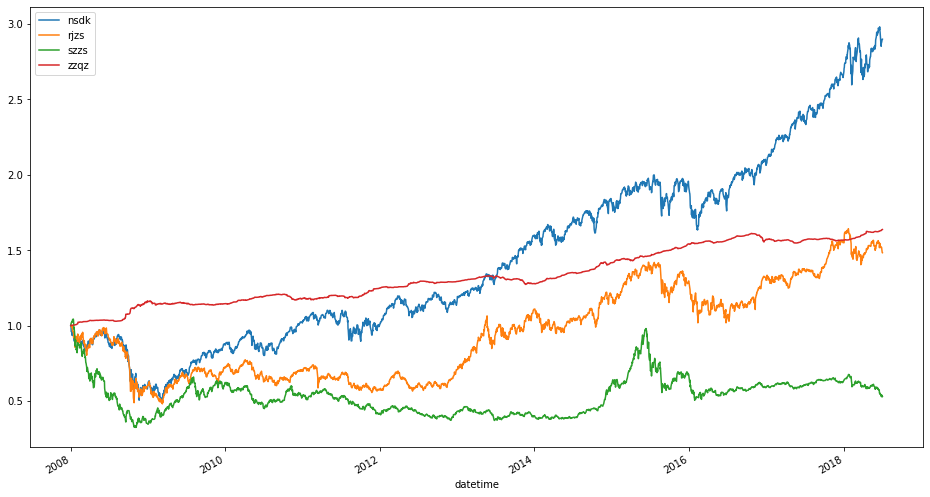

In [11]:
summary_df.plot(figsize=(16,9))

In [12]:
summary_df.to_hdf('processed_data.h5',key='data')